 Lab 11: Visualizing Time Series Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import calmap

from statsmodels.graphics.tsaplots import plot_acf

1. Time series Line Plot

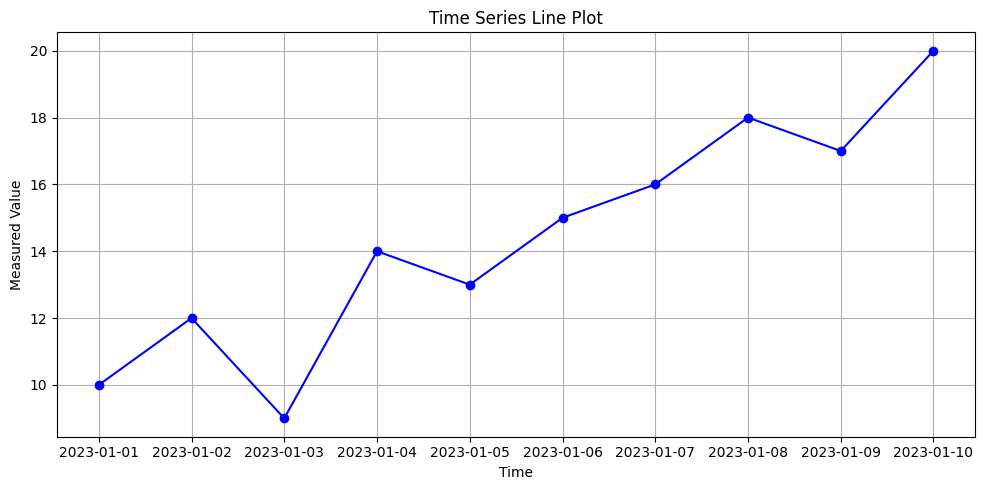

In [4]:


# Sample time series data
data = {
    'time': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 12, 9, 14, 13, 15, 16, 18, 17, 20]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['value'], marker='o', linestyle='-', color='b')
plt.title('Time Series Line Plot')
plt.xlabel('Time')
plt.ylabel('Measured Value')
plt.grid(True)
plt.tight_layout()
plt.show()


2. Seasonal Decomposition

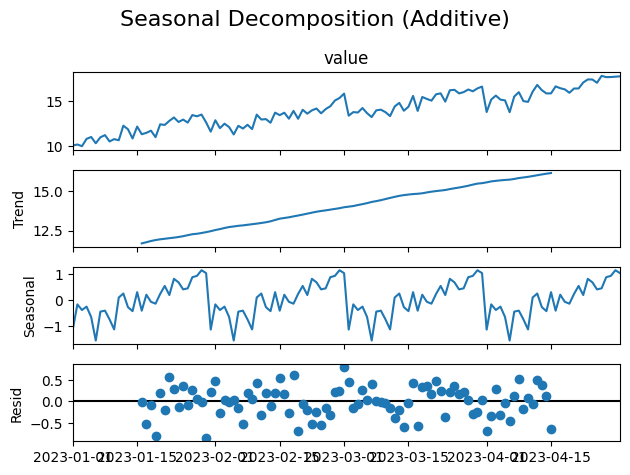

In [5]:


# Sample time series data (daily with some seasonality)
time = pd.date_range(start='2023-01-01', periods=120, freq='D')
trend = 10 + 0.05 * np.arange(120)  # convert range to np.arange
seasonality = 2 * ((np.arange(120) % 30) / 30)
noise = 0.5 * np.random.randn(120)

values = trend + seasonality + noise

df = pd.DataFrame({'time': time, 'value': values}).set_index('time')

# Seasonal Decomposition (Additive)
result = seasonal_decompose(df['value'], model='additive', period=30)

# Plot decomposition components
result.plot()
plt.suptitle('Seasonal Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()


3. Bar Chart (Average by Month)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1176\554830627.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['value'].resample('M').mean()


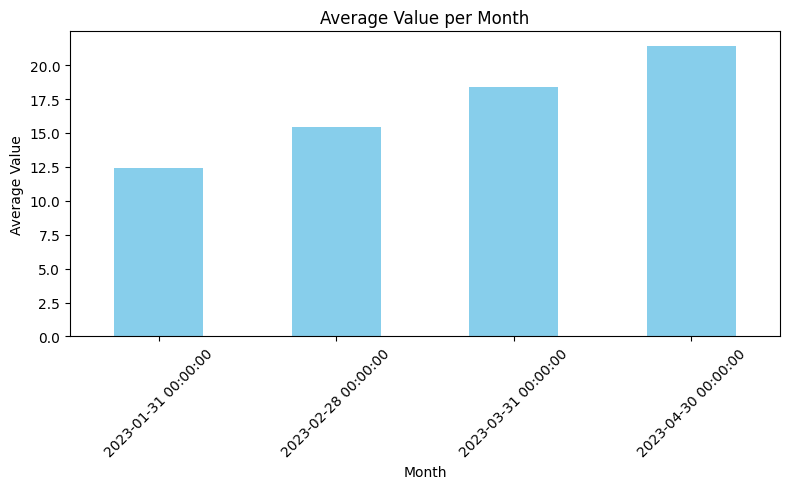

In [7]:


# Sample time series data (daily)
data = {
    'time': pd.date_range(start='2023-01-01', periods=120, freq='D'),
    'value': 10 + 0.1 * np.arange(120) + 2 * ((np.arange(120) % 30) / 30)  # trend + seasonality
}
df = pd.DataFrame(data).set_index('time')

# Group by month and calculate average value
monthly_avg = df['value'].resample('M').mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Value per Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Calendar Heatmap (Year vs Month) 

<Figure size 1500x600 with 0 Axes>

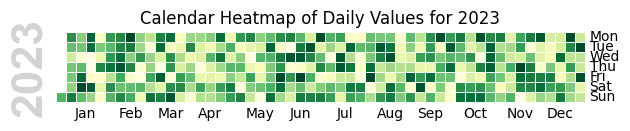

In [8]:


dates = pd.date_range(start='2023-01-01', end='2023-12-31')
values = np.random.rand(len(dates)) * 100  # Random values between 0 and 100
data = pd.Series(values, index=dates)
plt.figure(figsize=(15, 6))
calmap.calendarplot(data, cmap='YlGn', fillcolor='lightgrey', linewidth=0.5)
plt.title('Calendar Heatmap of Daily Values for 2023')
plt.show()


5. Autocorrelation Plot

<Figure size 1000x500 with 0 Axes>

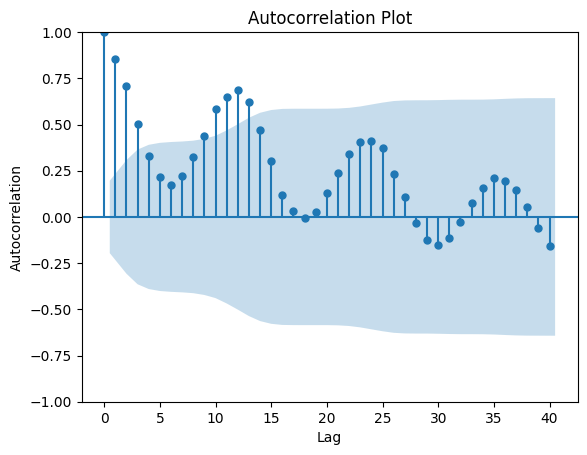

In [9]:


# Sample time series data with seasonality
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = 10 + 0.1 * np.arange(100) + 3 * np.sin(2 * np.pi * np.arange(100) / 12) + np.random.randn(100)
ts = pd.Series(values, index=dates)

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plot_acf(ts, lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


6. Lag Plot (lag=1) 

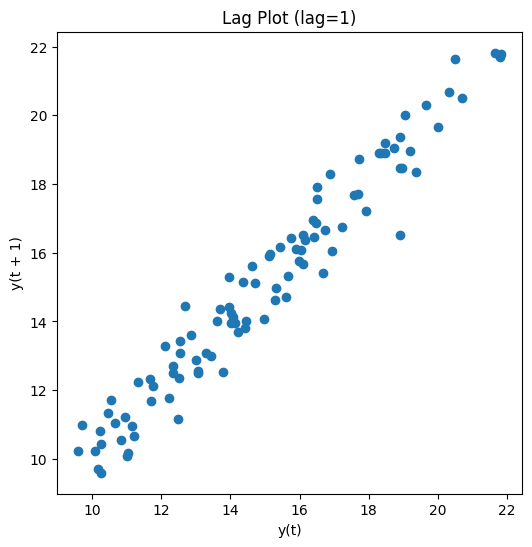

In [10]:


# Sample time series data with some pattern
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = 10 + 0.1 * np.arange(100) + 2 * np.sin(2 * np.pi * np.arange(100) / 30) + np.random.randn(100) * 0.5
ts = pd.Series(values, index=dates)

# Lag-1 plot
plt.figure(figsize=(6, 6))
lag_plot(ts, lag=1)
plt.title('Lag Plot (lag=1)')
plt.show()
